In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
book_data = pd.read_csv('book (1).csv')
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
book_data.shape

(2000, 11)

In [6]:
book_data.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
book_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

#### 1) For support value = 0.09 and confidence value = 0.1 and maximum value of item sets = 2

In [17]:
from mlxtend.frequent_patterns import apriori,association_rules

In [18]:
frequent_items_set = apriori(df=book_data,min_support=0.09,use_colnames=True,max_len=2)
frequent_items_set.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [19]:
association_rules = association_rules(df=frequent_items_set,metric = 'confidence',min_threshold=0.1)

In [20]:
association_rules.shape

(42, 9)

In [21]:
association_rules.sort_values(by='lift',ascending=False,inplace=True)
association_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
30,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
41,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
40,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
39,(GeogBks),(RefBks),0.2760,0.2145,0.1105,0.400362,1.866491,0.051298,1.309958


##### Observations:
Total 42 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:
* Cookbooks and ItalCook are most likely to be bought together than just buying ItalCook alone.
* ItalCook and CookBks are most likely to be bought together than just buying CookBks alone.
* ArtBks and GeogBks are most likely to be bought together than just buying GeogBks alone.
* GeogBks and ArtBks are most likely to be bought together than just buying ArtBks alone.
* GeogBks and RefBks are most likely to be bought together than just buying ReBks alone.

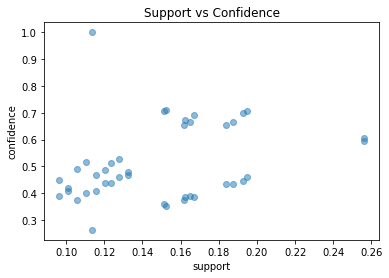

In [22]:
plt.scatter(association_rules['support'],association_rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

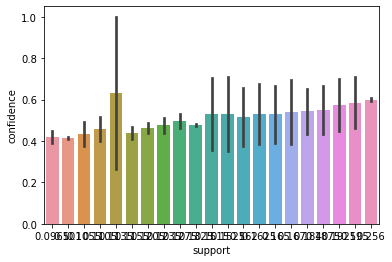

In [23]:
sns.barplot(x='support',y='confidence',data=association_rules)

#### 2) For support value = 0.1 and confidence = 0.2,maximum length  = 5

In [28]:
frequent_items_set1 = apriori(df=book_data,min_support=0.1,use_colnames=True,max_len=5)
frequent_items_set1.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [30]:
from mlxtend.frequent_patterns import apriori,association_rules
association_rules1 = association_rules(df=frequent_items_set1,metric = 'confidence',min_threshold=0.2)
association_rules1.sort_values(by='lift',ascending=False,inplace=True)
association_rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674


In [31]:
association_rules1.shape

(100, 9)

#### Observations:
Total 100 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:

* Cookbooks and ItalCook are most likely to be bought together than just buying ItalCook alone.
* ItalCook and CookBks are most likely to be bought together than just buying CookBks alone.
* (ChildBks,ArtBks) and GeogBks are most likely to be bought together than just buying GeogBks 
  alone.
* GeogBks and (ChildBks,ArtBks) are most likely to be bought together than just buying
  (ChildBks,ArtBks) alone.
* ArtBks and (DoltYBks,CookBks) are most likely to be bought together than just buying 
  (DoltYBks,CookBks) alone.

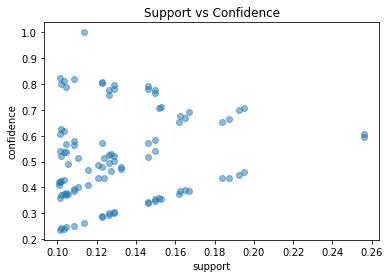

In [33]:
plt.scatter(association_rules1['support'],association_rules1['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

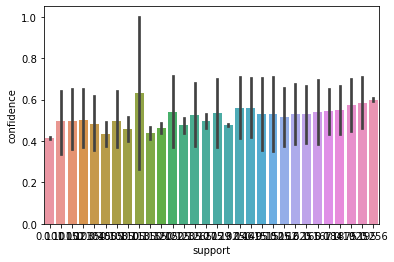

In [34]:
sns.barplot(x='support',y='confidence',data=association_rules1)

#### 3) For support value = 0.05 and confidence value = 0.5 and maximum length of item sets = 3

In [35]:
frequent_items_set2 = apriori(df=book_data,min_support=0.05,use_colnames=True,max_len=3)
frequent_items_set2.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [36]:
from mlxtend.frequent_patterns import apriori,association_rules
association_rules2 = association_rules(df=frequent_items_set2,metric = 'confidence',min_threshold=0.5)
association_rules2.sort_values(by='lift',ascending=False,inplace=True)
association_rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
114,(ItalCook),"(GeogBks, CookBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
50,(ItalCook),"(CookBks, ChildBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
104,(ItalCook),"(CookBks, DoItYBks)",0.1135,0.1875,0.0585,0.515419,2.748899,0.037219,1.676705
28,"(YouthBks, ChildBks)",(RefBks),0.1650,0.2145,0.0830,0.503030,2.345130,0.047608,1.580579


In [37]:
association_rules2.shape

(124, 9)

##### Observations:
Total 124 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:
* ItalCook and (YouthBks,CookBks)are most likely to be bought together than just buying 
  (YouthBks,CookBks) alone.
* ItalCook and (CookBks,GeogBks) are most likely to be bought together than just buying
  (CookBks,GeogBks) alone.
* ItalCook and (ChildBks,CookBks) and GeogBks are most likely to be bought together than just 
  buying (ChildBks,CookBks)alone.
* ItalCook and (DoltYBks,CookBks) are most likely to be bought together than just buying
  (DoltYBks,CookBks)alone.
* (ChildBks,YouthBks) and RefBks are most likely to be bought together than just buying
  RefBks alone.

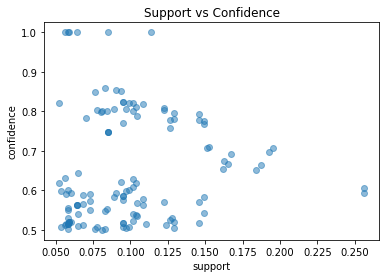

In [38]:
plt.scatter(association_rules2['support'],association_rules2['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

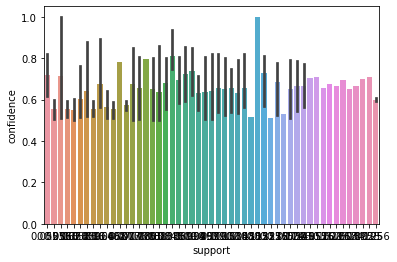

In [39]:
sns.barplot(x='support',y='confidence',data=association_rules2)

#### For support value = 0.02 and confidence value = 0.7 and maximum length of item sets = 10

In [40]:
frequent_items_set3 = apriori(df=book_data,min_support=0.02,use_colnames=True,max_len=10)
frequent_items_set3.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [41]:
from mlxtend.frequent_patterns import apriori,association_rules
association_rules3 = association_rules(df=frequent_items_set3,metric = 'confidence',min_threshold=0.7)
association_rules3.sort_values(by='lift',ascending=False,inplace=True)
association_rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
333,"(CookBks, ChildBks, ItalAtlas)","(RefBks, ItalCook)",0.0225,0.0465,0.0200,0.888889,19.115890,0.018954,8.581500
238,"(CookBks, ItalAtlas)","(RefBks, ItalCook)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864
372,"(ItalArt, GeogBks, CookBks)","(ArtBks, ItalCook)",0.0250,0.0565,0.0240,0.960000,16.991150,0.022587,23.587500
336,"(CookBks, ItalAtlas)","(RefBks, ItalCook, ChildBks)",0.0285,0.0415,0.0200,0.701754,16.909744,0.018817,3.213794
346,"(ItalArt, CookBks, ChildBks)","(ArtBks, ItalCook)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000


In [42]:
association_rules3.shape

(391, 9)

##### Observations:
Total 391 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:

* (CookBks, ChildBks, ItalAtlas) are most likely to be bought together than just buying (RefBks,
  ItalCook) alone.
* (CookBks, ItalAtlas) and (RefBks, ItalCook) are most likely to be bought together than just
  buying (RefBks, ItalCook)	 alone.
* (ItalArt, GeogBks, CookBks) and (ArtBks, ItalCook) are most likely to be bought together than   
  just buying (ArtBks, ItalCook)alone.
* (CookBks, ItalAtlas) and (RefBks, ItalCook, ChildBks) are most likely to be bought together  
  than just buying (RefBks, ItalCook, ChildBks) alone.
* (ItalArt, CookBks, ChildBks) and (ArtBks, ItalCook) are most likely to be bought together than 
   just buying (ArtBks, ItalCook) alone.

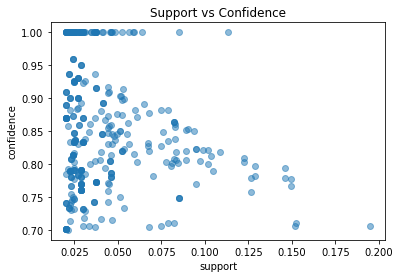

In [43]:
plt.scatter(association_rules3['support'],association_rules3['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

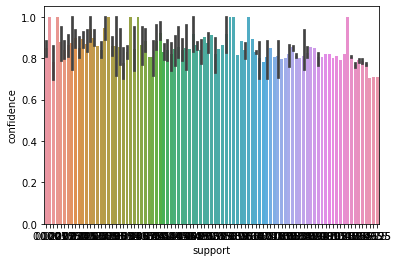

In [44]:
sns.barplot(x='support',y='confidence',data=association_rules3)